In [2]:
# plot 한글 깨짐 방지 코드
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

### 분류 알고리즘 선택

- 특성을 선택하고 훈련 샘플을 모은다.
- 성능 지표를 확인한다.
- 분류 모델과 최적화 알고리즘을 선택한다.
- 모델의 성능을 평가한다.
- 알고리즘을 튜닝한다.

### 사이킷런 퍼셉트론 훈련


In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

# 0 : setosa 1 : versicolor 2 : virginica

클래스 레이블: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


### 사이킷런 모듈을 이용해 데이터 표준화

#### fit() 매서드는 각 특성 차원마다 계산된 mu와 sigma를 사용하여 훈련 데이터셋을 표준화한다.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플의 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플의 개수: 1


In [9]:
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


### 경계를 나타내는 그래프 그리기

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],label=cl,
                    edgecolor='black')
    # 테스트 샘플을 부각하여 그린다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


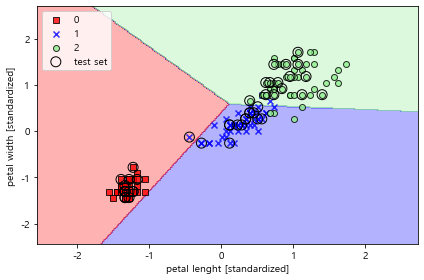

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 퍼셉트론 마무리

#### 간단하고 좋은 모델이지만, 클래스가 선형적으로 구분되어 있지 않을 때 수렴할 수 없다.

#### 에포크마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치 없데이트가 끝나지 않는다.

### 로지스틱 회귀 모델

#### 로지스틱 회귀는 이진 분류를 위한 선형 모델이다.
##### 다중 분류는 소프트맥스 회귀, 다항 로지스틱 회귀로 일반화해서 사용한다.

### odds ratio (오즈비): 특정 이벤트가 발생할 확률이다.
#### P가 양성 샘플일 확률일 때 P/(1-P)로 사용된다.
#### 오즈비에 로그 함수를 취해 logit 함수를 정의한다. logit(P) = log(P/(1-P))
#### logit(P) = w^T * x
#### P( y=1 | x ) --> x가 클래스 1에 속할 조건부 확률

### 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것은 logit 함수를 뒤집은 로지스틱 시그모이드 함수를 이용
#### phi(z) = 1/(1+e^(-z)) 이때 z는 가중치와 입력의 선형조합 = w^T * x

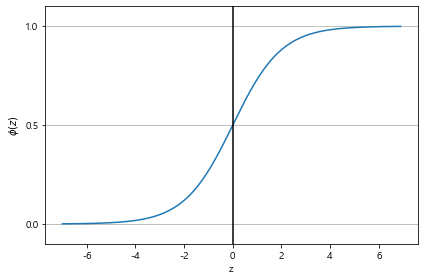

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+ np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$') # $$ 기호를 이용하여 그리스 문자 표현 가능
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 아달린과 로지스틱 회귀의 차이점
#### 로지스틱 회귀는 입력 벡터가 특정 클래스에 속할 확률을 출력해준다.
#### 예를 들어 phi(z) = 0.8이라면 이 샘플은 80%의 확률로 특정 클래스에 속하는 것이다.

In [13]:
from IPython.display import Image
Image(url='https://git.io/Jtm22', width=500) 

### 로지스틱 비용 함수의 가중치 학습

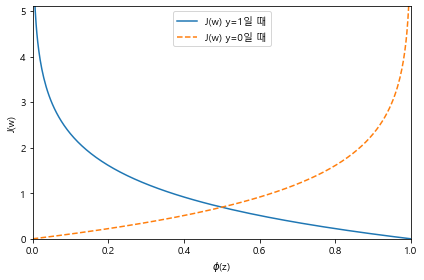

In [14]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) y=1일 때')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) y=0일 때')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [15]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


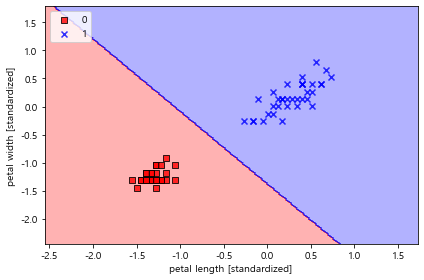

In [16]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

### 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


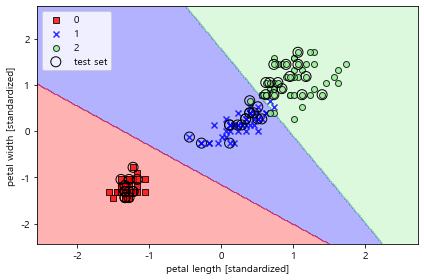

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

#### 훈련 샘플이 어떤 클래스에 속할 확률 

In [18]:
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

### 과적합을 막기 위한 방법

#### 규제 : 과도한 가중치 값을 제한하기 위해 추가적인 정보를 주입하는 개념
- 가장 많이 사용되는 규제는 L2 규제

In [19]:
Image(url='https://git.io/Jtm2V', width=700) 

### 규제 매개변수의 효과

C가 감소하면 가중치 절댓값이 줄어든다. -> 규제 강도가 증가한다.

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


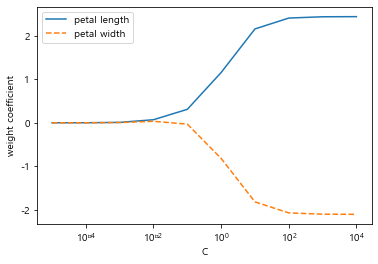

In [20]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

## 서포트 벡터 머신을 사용한 최대 마진 분류

### 서포트 벡터 머신 (Support Vector Machine, SVM)
#### 강력하고 널리 사용되는 학습 알고리즘으로 퍼셈트론의 확장이다.
#### 퍼셉트론 알고리즘을 사용하여 분류 오차를 최소화했다면 SVM은 마진을 최대하ㅘ 하는 것이다.
#### 마진은 클래스를 구분하는 결정경계와 이 경예게 가장 가까운 샘플 사이의 거리로 정의한다.

In [21]:
Image(url='https://git.io/Jtm2r', width=700) 

#### 큰 마진의 결정 경계를 원하는 이유는 일반화 오차가 낮아지는 경향이 있기 때문이다.
#### 반면, 작은 마진의 모델은 과적합되기 쉽습니다.

### $w^T (x_{pos} - x_{neg})\over\left\lvert w \right\rvert$ $=$ $2\over\left\lvert w \right\rvert$
#### 이 식의 좌변은 양성 쪽 초평면과 음성 쪽 초평면 사이의 거리로 해석할 수 있다.


### 슬랙 변수를 사용하여 비선형 분류 문제 다루기

#### 소프트 마진 분류 : 선형적으로 구분되지  않는 데이터에서 선형제약 조건을 완화할 필요가 있기 때문에 도입했다.

#### $1\over 2$$\vert w\vert ^2 + C (\sum_{i}{\xi^{(i)}})$
#### C를 통해 분류 오차에 대한 비용을 조정할 수 있습니다.
#### C 값이 크면 오차에 대한 비용이 커지고, 작으면 분류 오차에 덜 엄격해집니다.

In [22]:
Image(url='https://git.io/Jtm26', width=600) 

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


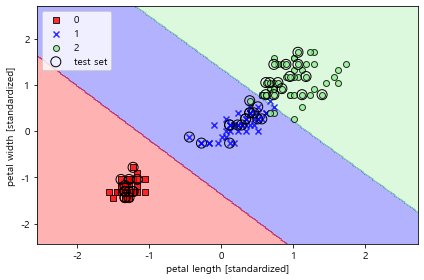

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()

### 사이킷런의 다른 구현

In [24]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### 커널 SVM을 사용하여 비선형 문제 풀기

#### 커널 SVM을 이용하면 비선형 분류문제를 풀 수 있다.

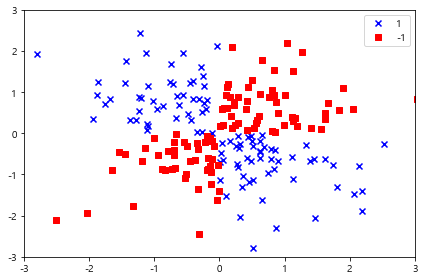

In [25]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

#### 선형 초평면으로 구분할 수 없다.
이렇게 선형적으로 구분되지 않는 데이터를 다루는 **커널 방법**의 기본 아이디어는 매핑 함수 $\phi$를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것이다.

- 매핑 함수 $\phi$를 이용해 훈련 데이터를 고차원 특성공간으로 변환한다.

In [26]:
Image(url='https://git.io/Jtm2X', width=700) 

#### 이 방식의 한 가지 문제점은 새로운 특성을 만드는 계산 비용이 매우 비싸다는 것이다.
#### 여기에 소위 커널 기법이 등장하게 됩니다.

#### 가장 많이 사용되는 커널은 '방사 기저 함수(RBF)', 가우시안 커널이다.

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


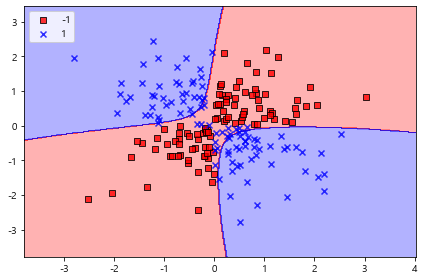

In [27]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

#### $\gamma$를 가우시안 구의 크기를 제한하는 매개변수로 이해할 수 있다.
#### $\gamma$ 값을 크게하면 서포트 벡터의 영향이나 범위가 줄어든다. 결정 경계는 더욱 샘플에 가까워지고 구불구불해진다.

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


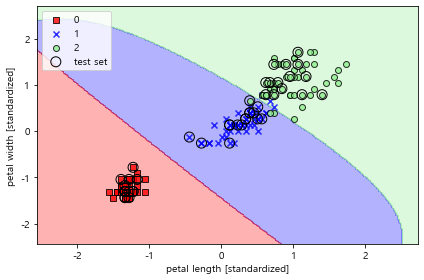

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_15.png', dpi=300)
plt.show()

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


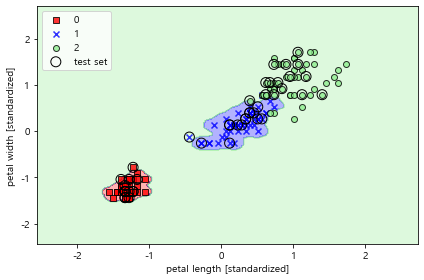

In [29]:
# 감마 값을 키운 버전

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_16.png', dpi=300)
plt.show()

## 결정 트리 학습

### 결정 트리(Decision Tree)
#### 결정트리는 설명이 중요할 때 사용하기 좋다
#### 일련의 질문들을 학습한다. 붓꽃 데이터 셋 같은 실수형 특성에는 "꽃 받침 너비가 2.8센티미터보다 큰가요?" 예/아니오 로 질문 할 수 있다.


In [30]:
Image(url='https://git.io/Jtm21', width=500) 

### 결정 알고리즘은 정보 이득(IG)이 최대가 되는 특성으로 데이터를 나눈다.

### $IG(D_p,f) = I(D_p)- \sum_{j=1}^{m} {{N_j}\over{N_p}} I(D_j)$

#### f는 분할에 사용되는 특성 D는 부모와 j번째 자식 노드의 데이터셋, I는 불순도의 지표이다.
#### 이진 결정트리에 널리 사용되는 세 개의 불순도 지표 또는 분할 조건은 지니 불순도(I_G), 엔트로피(I_H), 분류오차(I_E)다.
#### p(i|t)는 특정 노드 t에서 i에 속한 샘플의 비율이다.

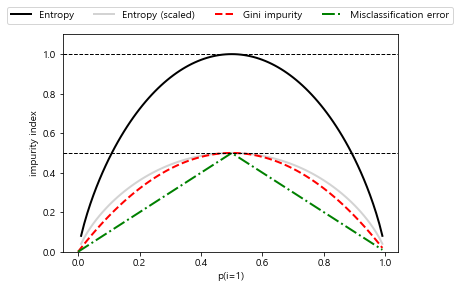

In [31]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
# plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

#### 각 세 개의 불순도 기준을 시각적으로 비교하기 위해 클래서의 1의 확률 범위 [0,1]에 대한 불순도 인덱스를 그린 결과이다

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


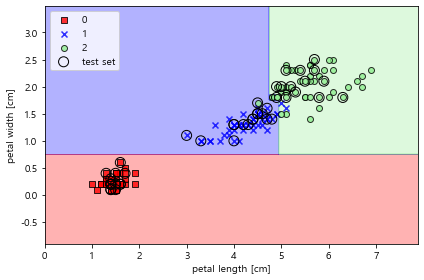

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_20.png', dpi=300)
plt.show()

#### 사이킷런의 결정 트리를 그리기 위해 GraphVIz를 이용하거나 아래와 같은 기능 이용

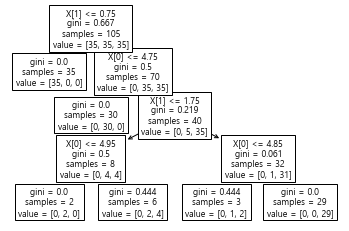

In [33]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

### 랜덤 포레스트로 여러 개의 결정 트리 연결

#### 앙상블 방법은 뛰어난 분류 성능과 과대적합에 안정적이다.
#### 배깅, 부스팅을 포함한 다양한 앙상블 방법이 있지만, 이번 장에서는 결정트리 기반의 랜덤 포레스트 알고리즘을 소개한다.

#### 랜덤 포레스트 이면의 아이디어는 여러 개의 결정 트리를 평균 내는 것이다.
#### 개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄인다.

### 랜덤 포레스트의 단계
- n개의 랜덤한 부프스트랩 샘플을 뽑는다. (훈련 데이터셋에서 중복을 허용하면서 n개의 샘플을 랜덤으로 뽑는다.)
- 부트스트랩 샘플에서 결정트리를 학습한다.
- a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택한다.
- b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할한다.
- 앞의 단계를 k번 반복한다.
- 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당한다.

#### 랜덤 포레스트는 결정 트리만큼 해석이 쉽지는 않다. 하지만, 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 되는 것이 큰 장점이다.
#### 랜덤 포레스트는 가지치기할 필요가 없습니다. 
#### 실전에서 신경 써야할 파라미터는 트리의 개수 하나이다.

#### n이 작아지면 무작위성이 증가하고 과대적합의 영향이 줄어든다. 하지만 작아질수록 성능도 점점 감소한다.
보통의 라이브러리는 부트스트랩 샘플의 크기를 데이터셋의 샘플 개수와 동일하게 한다.

#### 특성 개수 d는 보통 d = $\sqrt m$ 이때, m은 훈련 데이터 셋에 있는 특성 개수이다.

C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


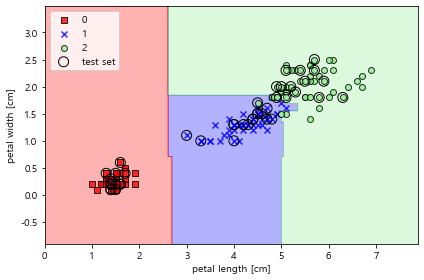

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', # 지니 불순도 사용
                                n_estimators=25, # 결정 트리의 개수
                                random_state=1,
                                n_jobs=2) # 사용하는 CPU의 개수 (병렬 수행)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_22.png', dpi=300)
plt.show()

## K-최근접 이웃

### KNN은 전형적인 게으른 학습기이다.
#### 단순하거나 느리기 때문이 아니라, 판별함수를 사용하는 것이 아니라 훈련 데이터셋을 메모리에 저장하기 때문이다.

#### KNN의 단계
- 숫자 k와 거리 측정 기준을 선택한다.
- 분류하려는 샘플에서 k개의 최근접 이웃을 찾습니다.
- 다수결 투표를 통해 클래스 레이블을 할당한다.



In [39]:
Image(url='https://git.io/Jtm25', width=400)

### 새로운 데이터 포인트("?")가 어떻게 이웃 다섯개의 다수결 투표를 기반으로 클래스에 할당되는지 보여준다.

### KNN은 메모리 기반 방식의 분류기이다.
#### 메모리 기반 방식의 분류기는 수집된 새로운 훈련 데이터에 즉시 적응할 수 있다.
#### 하지만, 샘플을 분류하는 계산의 복잡도가 크다.

#### 데이터셋의 차원이 적고, 알고리즘이 k-d 트리 같은 효율적인 데이터 구조로 구현되어 있지 않다면, 최악의 경우 O(n)이상의 복잡도를 가진다.


C:\Users\chang\AppData\Local\Temp/ipykernel_23108/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


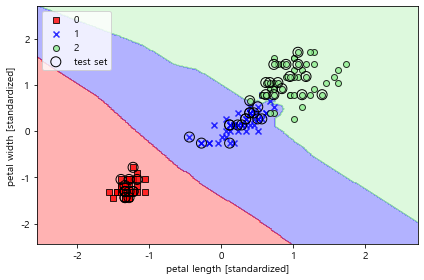

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski') # 유클리디안 거리와 맨해튼 거리를 일반화 한 것
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()

#### 위에서 사용한 minkowski 거리는 유클리디안 거리와 맨해튼 거리를 일반화 한 것이다.
#### - $d(x^{(i)},x^{(j)})=p \sqrt{\sum_k \lvert x_{k}^{(i)}-x_{k}^{(j)} \rvert ^p}$ 로 쓸 수 있다.
#### p를 2로 지정하면 유클리디안 거리가 되고, p를 1로 지정하면 맨해튼 거리가 된다.

## 요약

#### 모델 해석이 중요할 때는 결정트리가 사용하기 좋다

#### 로지스틱 회귀는 확률적 경사 하강법을 사용한 온라인 학습뿐 아니라 특정 이벤트 확률을 예측하는 것에도 사용할 수 있다.

#### 서포트 벡터 머신은 강력한 선형 모델이지만 커널 트릭을 사용하며 비선형 문제에도 확장할 수 있다.
#### 이 모델은 예측 성능을 높이기 위해 튜닝할 하이퍼파라미터가 많다.

#### 랜덤 포레스트와 같은 앙상블 모델은 매개변수 튜닝이 많이 필요하지 않고 결정 트리만큼 쉽게 과적합 되지 않는다.

#### KNN 분류기는 게으른 학습을 통한 다른 종류의 분류 방식을 사용한다.
#### 모델 훈련 없이 예측을 만들지만 예측 단계의 계산 비용이 높습니다.

#### 적절한 학습 알고리즘을 선택하는 것보다 더 중요한 것은 훈련 데이터셋에 있는 가용한 데이터다.
#### 어떤 알고리즘도 판단에 도움이 되는 특성 없이는 좋은 예측을 만들 수 없다.

### 즉, 강력한 머신 러닝 모델을 만들기 위해서는 데이터 전처리, 특성 선택, 차원 축소가 중요하다.